## DESCRIPCION DEL NOTEBOOK

En este notebook tiene como objetivo, realizar un ejemplo practico para los alumnos del **Master En Big Data Deportivo** del Módulo 2 - Introducción al Big Data.

**DATASET** <br>
En este notebook realizaremos una práctica de ejemplo a partir de un dataset que contiene todos los MVP de las ligas:
NBL Australia, EuroLeague, EuroCup, LNB Pro A, Lega Serie A, Liga ACB, Greek Basket League, NBA.

**Columnas del DataSet** 
<table>
  <colgroup span="4" class="columns"></colgroup>
  <tr>
    <th>Columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Season</td>
    <td>Temporada</td>
  </tr>
  <tr>
    <td>Player</td>
    <td>Nombre del jugador</td>
  </tr>
  <tr>
    <td>Team</td>
    <td>Nombre del Equipo</td>
  </tr>
  <tr>
    <td>Lg</td>
    <td>Liga</td>
  </tr>
  <tr>
    <td>G</td>
    <td>Cantidad de partidos que jugo en la temporada</td>
  </tr>
  <tr>
    <td>Lg</td>
    <td>Liga</td>
  </tr>
  <tr>
    <td>MP</td>
    <td>Minutos jugados por partido</td>
  </tr>
  <tr>
    <td>PTS</td>
    <td>Promedio de puntos por partido</td>
  </tr>
  <tr>
    <td>TRB</td>
    <td>Promedio de rebotes</td>
  </tr>
  <tr>
    <td>AST</td>
    <td>Promedio de Asistencias</td>
  </tr>
  <tr>
    <td>STL</td>
    <td>Robo</td>
  </tr>
  <tr>
    <td>BLK</td>
    <td>Promedio de Bloqueo - Tapones</td>
  </tr>
  <tr>
    <td>FG%</td>
    <td>Porcentaje de gol de campo</td>
  </tr>
  <tr>
    <td>3P%</td>
    <td>Porcentaje de aciertos de triples</td>
  </tr>
  <tr>
    <td>FT%</td>
    <td>Porcentaje de tiros libres</td>
  </tr>
</table>

**Puntos de Práctica** 
<ol>
  <li value="1">Cargar el CSV en Databricks en el sistema de Ficheros.</li>
  <li>Leer el CSV en un DataFrame con el tipo de columna correcto ( indicándole la estructura).</li>
  <li>Análisis exploratorio descriptivo de las columnas del dataframe ( recuento, media, max, min).</li>
  <li>Realizar una gráfica.</li>
  <li>Realizar una agrupación</li>
  <li>Filtrar filas.</li>
  <li>Cargar el DataFrame en una Vista / Tabla de Hive.</li>
  <li>Realizar una consulta SQL sobre la anterior tabla.</li>
</ol>

In [2]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import six

In [3]:
#En esta celda cargamos en el Notebook el DataSet que cargamos anteriormente a la carpeta de datos de nuestra cuenta de Databricks que se encuentra en el directorio /FileStore/tables/ que nos asigna Databricks.

# Guardamos en la variable file_location la ruta completa de nuestro DataSet
file_location = "/FileStore/tables/MVP_Basket.csv"
#Guardamo en la variable file_type el tipo de archivo de nuestro DataSet
file_type = "csv"

# Opciones de nuestro data set
# en infer_schema le vamos a decir a databricks a la hora de importar que tenga en cuenta la estructura de datos ca cada columna de forma automatica. O sea, se ve que en una columna son todos numeros enteros a esa columna le asigne el tipo de datos enteros.
infer_schema = "True"
#en first_row_is_header le vamos a decir a databricks que en el DataSet que vamos a importar la primer fila contiene los nombres de las columnas, si le ponemos False asignara nombre de columnas por defecto y el primer registro del DataSet lo tomara como registro de datos.
first_row_is_header = "True"
#en un archivo csv es un archivo de texto plano pero que tiene implicita sierta configuracion y entre ellas estan los caracteres que indican la separacion de columnas, saltos de lineas, etc. en este caso le diremos que las columnas del DataSet que cargaremos estaran separadas por una coma. No todos los CSV estan separados por coma las columnas puden estar separadas por punto y como o una tabulacion, etc para conocer cual es el caracter de separacion de columnas basta con abrir el DataSet con un editor de texto y se daran cuenta a simple vista.
delimiter = ","

#Las opciones aplicadas son para archivos CSV. Para otros tipos de archivos, estos se ignorarán.
#en la variable df guardaremos el dataframe con los datos del DataSet
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


In [4]:
#display() mostramos en pantalla en forma de tabla el contenido del dataframe
display(df)

Season Player Team Lg G MP PTS TRB AST STL BLK FG% 3P% FT% 2018-19 Andrew Bogut\andrew-bogut-1 Sydney NBL Australia�au 28 29.2 11.6 11.6 3.4 0.6 2.7 0.569 0 0.6 2018-19 Luke Sikma\luke-sikma-1 ALBA Berlin EuroCup�eu 24 27.0 11.3 6.6 4.2 1.5 0.5 0.482 0.389 0.769 2018-19 Jan Vesely\jan-vesely-1 Fenerbahce EuroLeague�eu 31 25.1 12.3 4.7 2.4 1.4 0.5 0.651 0.2 0.787 2018-19 David Holston\david-holston-1 Dijon LNB Pro A�fr 33 29.1 14.2 2.5 7.2 1.6 0 0.464 0.412 0.849 2018-19 Drew Crawford\drew-crawford-1 Vanoli Cremona Lega Serie A�it 25 31.5 17.8 4.4 2.0 0.8 0.3 0.505 0.37 0.763 2018-19 Nicolas Laprovittola\nicolas-laprovittola-1 Divina Seguros Joventut Liga ACB�es 34 30.6 17.2 2.5 6.4 1 0.1 0.466 0.391 0.792 2017-18 Scottie Wilbekin\scottie-wilbekin-1 Darussafaka EuroCup�eu 18 31.9 19.7 2.4 4.8 1.6 0 0.452 0.428 0.829 2017-18 Luka Doncic\luka-doncic-1 Real Madrid EuroLeague�eu 33 25.9 16.0 4.8 4.3 1.1 0.3 0.451 0.329 0.816 2017-18 Zachery Peacock\zachery-peacock-1 Bourg-en-Bresse LNB Pro A�fr 32 30.9 19.3 6.1 2.3 0.9 0.4 0.557 0.462 0.76 2017-18 Nick Calathes\nick-calathes-1 Panathinaikos Greek Basket League�gr 25 20.3 9.6 3.5 7.3 1.5 0.1 0.492 0.351 0.527 2017-18 Jason Rich\jason-rich-1 Sidigas Avellino Lega Serie A�it 30 29.6 19.3 2.7 3.0 0.7 0 0.493 0.394 0.817 2017-18 Luka Doncic\luka-doncic-1 Real Madrid Liga ACB�es 28 24.0 12.8 5.7 5.0 1.1 0.4 0.463 0.28 0.773 2016-17 Alexey Shved\alexey-shved-1 Khimki EuroCup�eu 14 31.4 22.1 4.0 5.2 1.2 0.5 0.453 0.378 0.693 2016-17 Sergio Llull\sergio-llull-1 Real Madrid EuroLeague�eu 33 27.8 16.5 1.8 5.9 0.7 0.1 0.416 0.33 0.847 2016-17 D.J. Cooper\dj-cooper-1 Pau-Lacq-Orthez LNB Pro A�fr 32 34.6 13.1 5.8 11.2 2.5 0.2 0.409 0.313 0.778 2016-17 Nick Calathes\nick-calathes-1 Panathinaikos Greek Basket League�gr 26 21.2 8.2 3.3 5.6 1 0 0.459 0.366 0.483 2016-17 Marcus Landry\marcus-landry-1 Germani Basket Brescia Lega Serie A�it 30 33.0 19.6 4.6 1.5 0.9 0.6 0.454 0.401 0.806 2016-17 Sergio Llull\sergio-llull-1 Real Madrid Liga ACB�es 30 25.9 16.1 1.4 5.3 0.6 0 0.444 0.372 0.794 2015-16 Errick McCollum\errick-mccollum-1 Galatasaray Istanbul EuroCup�eu 20 28.9 18.1 4.4 3.6 1 0.5 0.449 0.351 0.865 2015-16 Nando De Colo\nando-de-colo-1 CSKA Moscow EuroLeague�eu 27 27.7 19.4 3.6 5.0 1.1 0.1 0.526 0.46 0.908 2015-16 Devin Booker\devin-booker-1 Chalon/Saone LNB Pro A�fr 32 29.3 15.1 7.6 2.7 0.7 0.6 0.608 0.32 0.774 2015-16 Vassilis Spanoulis\vassilis-spanoulis-1 Olympiakos Greek Basket League�gr 21 24.3 12.3 1.4 5.8 0.8 0 0.386 0.303 0.798 2015-16 James Nunnally\james-nunnally-1 Sidigas Avellino Lega Serie A�it 30 31.6 18.4 4.3 2.1 0.7 0.1 0.462 0.393 0.905 2015-16 Ioannis Bourousis\yiannis-bouroussis-1 Laboral Kutxa Baskonia Liga ACB�es 32 22.8 12.9 7.1 2.2 0.9 0.5 0.515 0.37 0.881 2014-15 Tyrese Rice\tyrese-rice-1 BC Khimki EuroCup�eu 24 29.4 17.0 2.3 5.5 0.8 0 0.493 0.388 0.857 2014-15 Nemanja Bjelica\nemanja-bjelica-1 Fenerbahce Ulker EuroLeague�eu 29 27.8 12.1 8.5 1.9 1.3 0.7 0.5 0.351 0.684 2014-15 Adrien Moerman\adrien-moerman-1 Limoges CSP LNB Pro A�fr 34 29.3 14.6 8.7 2.4 1.4 0.4 0.508 0.438 0.721 2014-15 Aleksandar Vezenkov\aleksandar-vezenkov-1 Aris Greek Basket League�gr 26 32.9 18.0 7.7 1.8 0.9 0.3 0.499 0.39 0.78 2014-15 Tony Mitchell\tony-mitchell-1 Dolomiti Energia Trento Lega Serie A�it 29 30.9 20.7 5.4 2.5 1.4 0.7 0.388 0.339 0.692 2014-15 Felipe Reyes\felipe-reyes-1 Real Madrid Liga ACB�es 32 20.0 12.0 5.5 1.0 0.8 0.4 0.523 0.235 0.782 2013-14 Andrew Goudelock\andrew-goudelock-1 UNICS Kazan EuroCup�eu 24 27.8 18.8 2.0 3.1 0.8 0.1 0.453 0.409 0.873 2013-14 Sergio Rodriguez\sergio-rodriguez-1 Real Madrid EuroLeague�eu 31 22.4 14.0 2.0 4.9 1.2 0.1 0.505 0.5 0.906 2013-14 Antoine Diot\antoine-diot-1 Strasbourg IG LNB Pro A�fr 26 29.5 11.2 3.3 5.3 1.6 0.2 0.46 0.41 0.872 2013-14 Randal Falker\randal-falker-1 SLUC Nancy LNB Pro A�fr 29 35.2 11.2 9.3 3.7 1 1.9 0.524 0 0.698 2013-14 Dimitris Diamantidis\dimitris-diamantidis-1 Panathinaikos Greek Basket League�gr 25 20.6 7.6 2.0 4.6 0.9 

In [5]:
#con printSchema() mostramos la lista de columnas con sus respectivos tipos de datos
df.printSchema()

root
-- Season: string (nullable = true)
-- Player: string (nullable = true)
-- Team: string (nullable = true)
-- Lg: string (nullable = true)
-- G: integer (nullable = true)
-- MP: double (nullable = true)
-- PTS: double (nullable = true)
-- TRB: double (nullable = true)
-- AST: double (nullable = true)
-- STL: string (nullable = true)
-- BLK: string (nullable = true)
-- FG%: double (nullable = true)
-- 3P%: string (nullable = true)
-- FT%: double (nullable = true)

#### FUNCION DE USUARIO limpiar texto
 vemos que el nombre de la liga se encuentra con un caracter extraño asique podriamos en primer medida podriamos acomodar el nombre de las ligas. 
 Una buena tecnica para estos casos es crear una funcion definida por el usuario y haremos la llamada cuando filtremos las columnas que deseamos trabajar
 lo que hacemos dentro de esta funcion es agregar todas las condiciones que queremos ir limpiando, por ejemplo en lo que nosotros hacemos es cuando encuentra esa secuencia rara de caracteres reemplazarla por nada

In [7]:
def clean_text(c):
  c = F.regexp_replace(c, "�eu", "")
  c = F.regexp_replace(c, "�au", "")
  c = F.regexp_replace(c, "�es", "")
  c = F.regexp_replace(c, "�it", "")
  c = F.regexp_replace(c, "�fr", "")
  c = F.regexp_replace(c, "�gr", "")
  c = F.regexp_replace(c, "�fr", "")
  return c

* Seleccionamos las columnas que más me interesan y **en la columna de la Liga vamos a aplicarle la funcion que hicimos en la celda anterior** filtraremos del df las ultimas 3 columnas ya que para este caso no vamos a usarlas. esto no significa que las borraremos ya que si las volvieramos a necesitar las tendriamos en el data fram principal llamado df. como recomendacion el dataframe principal no se modifique sino se crean copias del mismo ya que si necesitasemos nuevamente de el no tengamos que volver a importarlo.

In [9]:
columnas = ["Player","Team",clean_text("Lg").alias("Liga"),"G","MP","PTS","TRB","AST","STL","BLK"]

df_1 = df.select(columnas)

In [10]:
display(df_1)

Player Team Liga G MP PTS TRB AST STL BLK Andrew Bogut\andrew-bogut-1 Sydney NBL Australia 28 29.2 11.6 11.6 3.4 0.6 2.7 Luke Sikma\luke-sikma-1 ALBA Berlin EuroCup 24 27.0 11.3 6.6 4.2 1.5 0.5 Jan Vesely\jan-vesely-1 Fenerbahce EuroLeague 31 25.1 12.3 4.7 2.4 1.4 0.5 David Holston\david-holston-1 Dijon LNB Pro A 33 29.1 14.2 2.5 7.2 1.6 0 Drew Crawford\drew-crawford-1 Vanoli Cremona Lega Serie A 25 31.5 17.8 4.4 2.0 0.8 0.3 Nicolas Laprovittola\nicolas-laprovittola-1 Divina Seguros Joventut Liga ACB 34 30.6 17.2 2.5 6.4 1 0.1 Scottie Wilbekin\scottie-wilbekin-1 Darussafaka EuroCup 18 31.9 19.7 2.4 4.8 1.6 0 Luka Doncic\luka-doncic-1 Real Madrid EuroLeague 33 25.9 16.0 4.8 4.3 1.1 0.3 Zachery Peacock\zachery-peacock-1 Bourg-en-Bresse LNB Pro A 32 30.9 19.3 6.1 2.3 0.9 0.4 Nick Calathes\nick-calathes-1 Panathinaikos Greek Basket League 25 20.3 9.6 3.5 7.3 1.5 0.1 Jason Rich\jason-rich-1 Sidigas Avellino Lega Serie A 30 29.6 19.3 2.7 3.0 0.7 0 Luka Doncic\luka-doncic-1 Real Madrid Liga ACB 28 24.0 12.8 5.7 5.0 1.1 0.4 Alexey Shved\alexey-shved-1 Khimki EuroCup 14 31.4 22.1 4.0 5.2 1.2 0.5 Sergio Llull\sergio-llull-1 Real Madrid EuroLeague 33 27.8 16.5 1.8 5.9 0.7 0.1 D.J. Cooper\dj-cooper-1 Pau-Lacq-Orthez LNB Pro A 32 34.6 13.1 5.8 11.2 2.5 0.2 Nick Calathes\nick-calathes-1 Panathinaikos Greek Basket League 26 21.2 8.2 3.3 5.6 1 0 Marcus Landry\marcus-landry-1 Germani Basket Brescia Lega Serie A 30 33.0 19.6 4.6 1.5 0.9 0.6 Sergio Llull\sergio-llull-1 Real Madrid Liga ACB 30 25.9 16.1 1.4 5.3 0.6 0 Errick McCollum\errick-mccollum-1 Galatasaray Istanbul EuroCup 20 28.9 18.1 4.4 3.6 1 0.5 Nando De Colo\nando-de-colo-1 CSKA Moscow EuroLeague 27 27.7 19.4 3.6 5.0 1.1 0.1 Devin Booker\devin-booker-1 Chalon/Saone LNB Pro A 32 29.3 15.1 7.6 2.7 0.7 0.6 Vassilis Spanoulis\vassilis-spanoulis-1 Olympiakos Greek Basket League 21 24.3 12.3 1.4 5.8 0.8 0 James Nunnally\james-nunnally-1 Sidigas Avellino Lega Serie A 30 31.6 18.4 4.3 2.1 0.7 0.1 Ioannis Bourousis\yiannis-bouroussis-1 Laboral Kutxa Baskonia Liga ACB 32 22.8 12.9 7.1 2.2 0.9 0.5 Tyrese Rice\tyrese-rice-1 BC Khimki EuroCup 24 29.4 17.0 2.3 5.5 0.8 0 Nemanja Bjelica\nemanja-bjelica-1 Fenerbahce Ulker EuroLeague 29 27.8 12.1 8.5 1.9 1.3 0.7 Adrien Moerman\adrien-moerman-1 Limoges CSP LNB Pro A 34 29.3 14.6 8.7 2.4 1.4 0.4 Aleksandar Vezenkov\aleksandar-vezenkov-1 Aris Greek Basket League 26 32.9 18.0 7.7 1.8 0.9 0.3 Tony Mitchell\tony-mitchell-1 Dolomiti Energia Trento Lega Serie A 29 30.9 20.7 5.4 2.5 1.4 0.7 Felipe Reyes\felipe-reyes-1 Real Madrid Liga ACB 32 20.0 12.0 5.5 1.0 0.8 0.4 Andrew Goudelock\andrew-goudelock-1 UNICS Kazan EuroCup 24 27.8 18.8 2.0 3.1 0.8 0.1 Sergio Rodriguez\sergio-rodriguez-1 Real Madrid EuroLeague 31 22.4 14.0 2.0 4.9 1.2 0.1 Antoine Diot\antoine-diot-1 Strasbourg IG LNB Pro A 26 29.5 11.2 3.3 5.3 1.6 0.2 Randal Falker\randal-falker-1 SLUC Nancy LNB Pro A 29 35.2 11.2 9.3 3.7 1 1.9 Dimitris Diamantidis\dimitris-diamantidis-1 Panathinaikos Greek Basket League 25 20.6 7.6 2.0 4.6 0.9 0.2 Drake Diener\drake-diener-1 Banco di Sardegna Sassari Lega Serie A 30 31.2 19.4 4.3 2.8 1 0.2 Justin Doellman\justin-doellman-1 Valencia Basket Liga ACB 32 26.3 15.0 4.4 2.5 1.7 0.7 Nick Calathes\nick-calathes-1 Lokomotiv-Kuban EuroCup 17 33.8 12.9 5.9 6.7 1.4 0.1 Vassilis Spanoulis\vassilis-spanoulis-1 Olympiakos EuroLeague 31 30.0 14.7 2.2 5.5 0.9 0 Dwight Buycks\dwight-buycks-1 BCM Gravelines LNB Pro A 30 31.6 18.2 3.2 2.9 1.4 0.1 Edwin Jackson\edwin-jackson-1 ASVEL Basket LNB Pro A 30 29.6 16.4 3.3 2.8 1 0.1 Stephane Lasme\stephane-lasme-1 Panathinaikos Greek Basket League 24 19.6 10.0 5.3 0.5 0.5 1 Luigi Datome\luigi-datome-1 Acea Roma Lega Serie A 29 32.8 16.9 5.8 1.8 1.6 0.9 Nikola Mirotic\nikola-mirotic-1 Real Madrid Liga ACB 33 23.4 12.6 5.5 0.9 0.9 0.8 Patrick Beverley\patrick-beverley-1 Spartak St. Petersburg EuroCup 16 31.9 13.3 4.1 3.7 1.9 0.3 Andrei Kirilenko\andrei-kirilenko-1 CSKA Moscow EuroLeague 17 29.9 14.1 7.5 2.4 1.5 1.9 Blake Schilb\blake-schilb-

Tambien podriamos **cambiarles el nombre de las columnas** por nombres mas significativos sin usar ninguna libreria con **ALIAS** , o **cambiar el tipo con CAST**
* .alias("nuevo_nombre")
* .cast("nuevo_tipo_de_datos")

In [12]:
df_2 = df_1.select(
                df_1.Player.alias("Jugador"),
                df_1.Team.alias("Equipo"),
                df_1.Liga,
                df_1.G.alias("Partidos_Jugados"),
                df_1.MP.alias("Prom_Minutos_por_Partido"),
                df_1.PTS.alias("Prom_Puntos_por_Partido"),
                df_1.TRB.alias("Prom_Rebotes_Partido"),
                df_1.AST.alias("Prom_Asistencias_por_Partido"),
                df_1.STL.alias("Prom_Robos_por_Partido").cast("double"),
                df_1.BLK.alias("Prom_Tapas_por_Partido").cast("double"))

In [13]:
display(df_2)

Jugador Equipo Liga Partidos_Jugados Prom_Minutos_por_Partido Prom_Puntos_por_Partido Prom_Rebotes_Partido Prom_Asistencias_por_Partido Prom_Robos_por_Partido Prom_Tapas_por_Partido Andrew Bogut\andrew-bogut-1 Sydney NBL Australia 28 29.2 11.6 11.6 3.4 0.6 2.7 Luke Sikma\luke-sikma-1 ALBA Berlin EuroCup 24 27.0 11.3 6.6 4.2 1.5 0.5 Jan Vesely\jan-vesely-1 Fenerbahce EuroLeague 31 25.1 12.3 4.7 2.4 1.4 0.5 David Holston\david-holston-1 Dijon LNB Pro A 33 29.1 14.2 2.5 7.2 1.6 0.0 Drew Crawford\drew-crawford-1 Vanoli Cremona Lega Serie A 25 31.5 17.8 4.4 2.0 0.8 0.3 Nicolas Laprovittola\nicolas-laprovittola-1 Divina Seguros Joventut Liga ACB 34 30.6 17.2 2.5 6.4 1.0 0.1 Scottie Wilbekin\scottie-wilbekin-1 Darussafaka EuroCup 18 31.9 19.7 2.4 4.8 1.6 0.0 Luka Doncic\luka-doncic-1 Real Madrid EuroLeague 33 25.9 16.0 4.8 4.3 1.1 0.3 Zachery Peacock\zachery-peacock-1 Bourg-en-Bresse LNB Pro A 32 30.9 19.3 6.1 2.3 0.9 0.4 Nick Calathes\nick-calathes-1 Panathinaikos Greek Basket League 25 20.3 9.6 3.5 7.3 1.5 0.1 Jason Rich\jason-rich-1 Sidigas Avellino Lega Serie A 30 29.6 19.3 2.7 3.0 0.7 0.0 Luka Doncic\luka-doncic-1 Real Madrid Liga ACB 28 24.0 12.8 5.7 5.0 1.1 0.4 Alexey Shved\alexey-shved-1 Khimki EuroCup 14 31.4 22.1 4.0 5.2 1.2 0.5 Sergio Llull\sergio-llull-1 Real Madrid EuroLeague 33 27.8 16.5 1.8 5.9 0.7 0.1 D.J. Cooper\dj-cooper-1 Pau-Lacq-Orthez LNB Pro A 32 34.6 13.1 5.8 11.2 2.5 0.2 Nick Calathes\nick-calathes-1 Panathinaikos Greek Basket League 26 21.2 8.2 3.3 5.6 1.0 0.0 Marcus Landry\marcus-landry-1 Germani Basket Brescia Lega Serie A 30 33.0 19.6 4.6 1.5 0.9 0.6 Sergio Llull\sergio-llull-1 Real Madrid Liga ACB 30 25.9 16.1 1.4 5.3 0.6 0.0 Errick McCollum\errick-mccollum-1 Galatasaray Istanbul EuroCup 20 28.9 18.1 4.4 3.6 1.0 0.5 Nando De Colo\nando-de-colo-1 CSKA Moscow EuroLeague 27 27.7 19.4 3.6 5.0 1.1 0.1 Devin Booker\devin-booker-1 Chalon/Saone LNB Pro A 32 29.3 15.1 7.6 2.7 0.7 0.6 Vassilis Spanoulis\vassilis-spanoulis-1 Olympiakos Greek Basket League 21 24.3 12.3 1.4 5.8 0.8 0.0 James Nunnally\james-nunnally-1 Sidigas Avellino Lega Serie A 30 31.6 18.4 4.3 2.1 0.7 0.1 Ioannis Bourousis\yiannis-bouroussis-1 Laboral Kutxa Baskonia Liga ACB 32 22.8 12.9 7.1 2.2 0.9 0.5 Tyrese Rice\tyrese-rice-1 BC Khimki EuroCup 24 29.4 17.0 2.3 5.5 0.8 0.0 Nemanja Bjelica\nemanja-bjelica-1 Fenerbahce Ulker EuroLeague 29 27.8 12.1 8.5 1.9 1.3 0.7 Adrien Moerman\adrien-moerman-1 Limoges CSP LNB Pro A 34 29.3 14.6 8.7 2.4 1.4 0.4 Aleksandar Vezenkov\aleksandar-vezenkov-1 Aris Greek Basket League 26 32.9 18.0 7.7 1.8 0.9 0.3 Tony Mitchell\tony-mitchell-1 Dolomiti Energia Trento Lega Serie A 29 30.9 20.7 5.4 2.5 1.4 0.7 Felipe Reyes\felipe-reyes-1 Real Madrid Liga ACB 32 20.0 12.0 5.5 1.0 0.8 0.4 Andrew Goudelock\andrew-goudelock-1 UNICS Kazan EuroCup 24 27.8 18.8 2.0 3.1 0.8 0.1 Sergio Rodriguez\sergio-rodriguez-1 Real Madrid EuroLeague 31 22.4 14.0 2.0 4.9 1.2 0.1 Antoine Diot\antoine-diot-1 Strasbourg IG LNB Pro A 26 29.5 11.2 3.3 5.3 1.6 0.2 Randal Falker\randal-falker-1 SLUC Nancy LNB Pro A 29 35.2 11.2 9.3 3.7 1.0 1.9 Dimitris Diamantidis\dimitris-diamantidis-1 Panathinaikos Greek Basket League 25 20.6 7.6 2.0 4.6 0.9 0.2 Drake Diener\drake-diener-1 Banco di Sardegna Sassari Lega Serie A 30 31.2 19.4 4.3 2.8 1.0 0.2 Justin Doellman\justin-doellman-1 Valencia Basket Liga ACB 32 26.3 15.0 4.4 2.5 1.7 0.7 Nick Calathes\nick-calathes-1 Lokomotiv-Kuban EuroCup 17 33.8 12.9 5.9 6.7 1.4 0.1 Vassilis Spanoulis\vassilis-spanoulis-1 Olympiakos EuroLeague 31 30.0 14.7 2.2 5.5 0.9 0.0 Dwight Buycks\dwight-buycks-1 BCM Gravelines LNB Pro A 30 31.6 18.2 3.2 2.9 1.4 0.1 Edwin Jackson\edwin-jackson-1 ASVEL Basket LNB Pro A 30 29.6 16.4 3.3 2.8 1.0 0.1 Stephane Lasme\stephane-lasme-1 Panathinaikos Greek Basket League 24 19.6 10.0 5.3 0.5 0.5 1.0 Luigi Datome\luigi-datome-1 Acea Roma Lega Serie A 29 32.8 16.9 5.8 1.8 1.6 0.9 Nikola Mirotic\nikola-mirotic-1 Real Madrid Liga ACB 33 23.4 12.6 5.5 0.9 0.9 0.8 Patrick Beverley\patrick-beverley-1 Spar

### Otra  FORMA de hacer ALIAS cambiar nombre columnasy CAST cambiar tipo datos
* También podriamos cambiarles el nombre de las columnas por nombres mas significativos haciendo uso de la funcion col que está incluida en la libreria pyspark.sql.functions que importamos al inicio
* La sintaxis seria pyspark.sql.functions.col("Nombre_de_la columna") pero como nostros usamos un alias para la libreria que le pusimos F usamos el alias para simplificar la vista.
  * .alias("nuevo_nombre")
  * .cast("nuevo_tipo_de_datos")

In [15]:
df_2_1 = df_1.select(
                F.col("Player").alias("Jugador"),
                F.col("Team").alias("Equipo"),
                "Liga",
                F.col("G").alias("Partidos_Jugados"),
                F.col("MP").alias("Prom_Minutos_por_Partido"),
                F.col("PTS").alias("Prom_Puntos_por_Partido"),
                F.col("TRB").alias("Prom_Rebotes_Partido"),
                F.col("AST").alias("Prom_Asistencias_por_Partido"),
                F.col("STL").alias("Prom_Robos_por_Partido").cast("double"),
                F.col("BLK").alias("Prom_Tapas_por_Partido").cast("double"))

In [16]:
display(df_2_1)

Jugador Equipo Liga Partidos_Jugados Prom_Minutos_por_Partido Prom_Puntos_por_Partido Prom_Rebotes_Partido Prom_Asistencias_por_Partido Prom_Robos_por_Partido Prom_Tapas_por_Partido Andrew Bogut\andrew-bogut-1 Sydney NBL Australia 28 29.2 11.6 11.6 3.4 0.6 2.7 Luke Sikma\luke-sikma-1 ALBA Berlin EuroCup 24 27.0 11.3 6.6 4.2 1.5 0.5 Jan Vesely\jan-vesely-1 Fenerbahce EuroLeague 31 25.1 12.3 4.7 2.4 1.4 0.5 David Holston\david-holston-1 Dijon LNB Pro A 33 29.1 14.2 2.5 7.2 1.6 0.0 Drew Crawford\drew-crawford-1 Vanoli Cremona Lega Serie A 25 31.5 17.8 4.4 2.0 0.8 0.3 Nicolas Laprovittola\nicolas-laprovittola-1 Divina Seguros Joventut Liga ACB 34 30.6 17.2 2.5 6.4 1.0 0.1 Scottie Wilbekin\scottie-wilbekin-1 Darussafaka EuroCup 18 31.9 19.7 2.4 4.8 1.6 0.0 Luka Doncic\luka-doncic-1 Real Madrid EuroLeague 33 25.9 16.0 4.8 4.3 1.1 0.3 Zachery Peacock\zachery-peacock-1 Bourg-en-Bresse LNB Pro A 32 30.9 19.3 6.1 2.3 0.9 0.4 Nick Calathes\nick-calathes-1 Panathinaikos Greek Basket League 25 20.3 9.6 3.5 7.3 1.5 0.1 Jason Rich\jason-rich-1 Sidigas Avellino Lega Serie A 30 29.6 19.3 2.7 3.0 0.7 0.0 Luka Doncic\luka-doncic-1 Real Madrid Liga ACB 28 24.0 12.8 5.7 5.0 1.1 0.4 Alexey Shved\alexey-shved-1 Khimki EuroCup 14 31.4 22.1 4.0 5.2 1.2 0.5 Sergio Llull\sergio-llull-1 Real Madrid EuroLeague 33 27.8 16.5 1.8 5.9 0.7 0.1 D.J. Cooper\dj-cooper-1 Pau-Lacq-Orthez LNB Pro A 32 34.6 13.1 5.8 11.2 2.5 0.2 Nick Calathes\nick-calathes-1 Panathinaikos Greek Basket League 26 21.2 8.2 3.3 5.6 1.0 0.0 Marcus Landry\marcus-landry-1 Germani Basket Brescia Lega Serie A 30 33.0 19.6 4.6 1.5 0.9 0.6 Sergio Llull\sergio-llull-1 Real Madrid Liga ACB 30 25.9 16.1 1.4 5.3 0.6 0.0 Errick McCollum\errick-mccollum-1 Galatasaray Istanbul EuroCup 20 28.9 18.1 4.4 3.6 1.0 0.5 Nando De Colo\nando-de-colo-1 CSKA Moscow EuroLeague 27 27.7 19.4 3.6 5.0 1.1 0.1 Devin Booker\devin-booker-1 Chalon/Saone LNB Pro A 32 29.3 15.1 7.6 2.7 0.7 0.6 Vassilis Spanoulis\vassilis-spanoulis-1 Olympiakos Greek Basket League 21 24.3 12.3 1.4 5.8 0.8 0.0 James Nunnally\james-nunnally-1 Sidigas Avellino Lega Serie A 30 31.6 18.4 4.3 2.1 0.7 0.1 Ioannis Bourousis\yiannis-bouroussis-1 Laboral Kutxa Baskonia Liga ACB 32 22.8 12.9 7.1 2.2 0.9 0.5 Tyrese Rice\tyrese-rice-1 BC Khimki EuroCup 24 29.4 17.0 2.3 5.5 0.8 0.0 Nemanja Bjelica\nemanja-bjelica-1 Fenerbahce Ulker EuroLeague 29 27.8 12.1 8.5 1.9 1.3 0.7 Adrien Moerman\adrien-moerman-1 Limoges CSP LNB Pro A 34 29.3 14.6 8.7 2.4 1.4 0.4 Aleksandar Vezenkov\aleksandar-vezenkov-1 Aris Greek Basket League 26 32.9 18.0 7.7 1.8 0.9 0.3 Tony Mitchell\tony-mitchell-1 Dolomiti Energia Trento Lega Serie A 29 30.9 20.7 5.4 2.5 1.4 0.7 Felipe Reyes\felipe-reyes-1 Real Madrid Liga ACB 32 20.0 12.0 5.5 1.0 0.8 0.4 Andrew Goudelock\andrew-goudelock-1 UNICS Kazan EuroCup 24 27.8 18.8 2.0 3.1 0.8 0.1 Sergio Rodriguez\sergio-rodriguez-1 Real Madrid EuroLeague 31 22.4 14.0 2.0 4.9 1.2 0.1 Antoine Diot\antoine-diot-1 Strasbourg IG LNB Pro A 26 29.5 11.2 3.3 5.3 1.6 0.2 Randal Falker\randal-falker-1 SLUC Nancy LNB Pro A 29 35.2 11.2 9.3 3.7 1.0 1.9 Dimitris Diamantidis\dimitris-diamantidis-1 Panathinaikos Greek Basket League 25 20.6 7.6 2.0 4.6 0.9 0.2 Drake Diener\drake-diener-1 Banco di Sardegna Sassari Lega Serie A 30 31.2 19.4 4.3 2.8 1.0 0.2 Justin Doellman\justin-doellman-1 Valencia Basket Liga ACB 32 26.3 15.0 4.4 2.5 1.7 0.7 Nick Calathes\nick-calathes-1 Lokomotiv-Kuban EuroCup 17 33.8 12.9 5.9 6.7 1.4 0.1 Vassilis Spanoulis\vassilis-spanoulis-1 Olympiakos EuroLeague 31 30.0 14.7 2.2 5.5 0.9 0.0 Dwight Buycks\dwight-buycks-1 BCM Gravelines LNB Pro A 30 31.6 18.2 3.2 2.9 1.4 0.1 Edwin Jackson\edwin-jackson-1 ASVEL Basket LNB Pro A 30 29.6 16.4 3.3 2.8 1.0 0.1 Stephane Lasme\stephane-lasme-1 Panathinaikos Greek Basket League 24 19.6 10.0 5.3 0.5 0.5 1.0 Luigi Datome\luigi-datome-1 Acea Roma Lega Serie A 29 32.8 16.9 5.8 1.8 1.6 0.9 Nikola Mirotic\nikola-mirotic-1 Real Madrid Liga ACB 33 23.4 12.6 5.5 0.9 0.9 0.8 Patrick Beverley\patrick-beverley-1 Spar

### Valores Nulos isnan y isNull
* Otra funcion muy interesante es contar los **Valores nulos** o **vacios** de las columnas para saber si es necesario rellenarlos con algun valor de la siguiente forma podremos mostrar la cantidad de nulos que tiene cada columna

Vemos que hay 18 nulos en Prom_Robos_por_Partido y Prom_Tapas_por_Partido Tapones

In [18]:

display(  df_2.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_2.columns])   )


Jugador Equipo Liga Partidos_Jugados Prom_Minutos_por_Partido Prom_Puntos_por_Partido Prom_Rebotes_Partido Prom_Asistencias_por_Partido Prom_Robos_por_Partido Prom_Tapas_por_Partido 0 0 0 0 0 0 0 0 18 18

### Rellenar Valores nulos  na.fill

Como pudimos detectar que las columnas Prom_Robos_por_Partido y Prom_Tapas_por_Partido tiene valores nulos o vacios y cuando realicemos algun cálculo posiblemente nos influya en el resultado entonces buscaremos con la funcion **fill** esos valores y los rellenaremos con ceros con la siguiente sintaxis.

In [20]:
df_3 = df_2.na.fill({'Prom_Robos_por_Partido': 0})
df_3 = df_3.na.fill({'Prom_Tapas_por_Partido': 0})

**Ejecutamos de nuevo la instrucción anterior y revisamos que no existen nulos**

In [22]:
display(df_3.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_3.columns]))

Jugador Equipo Liga Partidos_Jugados Prom_Minutos_por_Partido Prom_Puntos_por_Partido Prom_Rebotes_Partido Prom_Asistencias_por_Partido Prom_Robos_por_Partido Prom_Tapas_por_Partido 0 0 0 0 0 0 0 0 0 0

#### Pasamos a hacer una análisis descriptivo estadístico del dataframe con DESCRIBE

In [24]:
display(df_3.describe())

summary Jugador Equipo Liga Partidos_Jugados Prom_Minutos_por_Partido Prom_Puntos_por_Partido Prom_Rebotes_Partido Prom_Asistencias_por_Partido Prom_Robos_por_Partido Prom_Tapas_por_Partido count 183 183 183 183 183 183 183 183 183 183 mean null null null 44.36065573770492 32.80109289617487 19.058469945355192 7.665573770491802 4.0683060109289615 1.262295081967213 0.6371584699453553 stddev null null null 25.385402563361275 6.4790701838587 6.784437740024416 5.405000287053137 2.4680109164800648 0.6859253638377136 0.8392412926428053 min Adrien Moerman\adrien-moerman-1 AEK Athens EuroCup 7 16.7 5.4 1.4 0.3 0.0 0.0 max Zachery Peacock\zachery-peacock-1 Winterthur FC Barcelona NBL Australia 82 47.3 37.6 27.0 12.8 4.3 4.1

##### Otra forma de ver mas atractivo  el resumen de las variables descriptivas es usando la funcion .toPandas() y .transpose() . 
* toPandas convierte un DATAFRAME de PySPARK en un DATAFRAME de Pandas

In [26]:
df_3.describe().toPandas().transpose()

0 
 1 
 2 
 3 
 4 
 
 
 
 
 summary 
 count 
 mean 
 stddev 
 min 
 max 
 
 
 Jugador 
 183 
 None 
 None 
 Adrien Moerman\adrien-moerman-1 
 Zachery Peacock\zachery-peacock-1 
 
 
 Equipo 
 183 
 None 
 None 
 AEK Athens 
 Winterthur FC Barcelona 
 
 
 Liga 
 183 
 None 
 None 
 EuroCup 
 NBL Australia 
 
 
 Partidos_Jugados 
 183 
 44.36065573770492 
 25.385402563361275 
 7 
 82 
 
 
 Prom_Minutos_por_Partido 
 183 
 32.80109289617487 
 6.4790701838587 
 16.7 
 47.3 
 
 
 Prom_Puntos_por_Partido 
 183 
 19.058469945355192 
 6.784437740024416 
 5.4 
 37.6 
 
 
 Prom_Rebotes_Partido 
 183 
 7.665573770491802 
 5.405000287053137 
 1.4 
 27.0 
 
 
 Prom_Asistencias_por_Partido 
 183 
 4.0683060109289615 
 2.4680109164800648 
 0.3 
 12.8 
 
 
 Prom_Robos_por_Partido 
 183 
 1.262295081967213 
 0.6859253638377136 
 0.0 
 4.3 
 
 
 Prom_Tapas_por_Partido 
 183 
 0.6371584699453553 
 0.8392412926428053 
 0.0 
 4.1

### Agrupar AGG
Si que hay que notar que la media y desviación estándar de los partidos jugados nos puede resultar extraña, debido a la gran descompensación que existe entre NBA y las ligas internacionales
Podemos observar el número mínimo de partidos jugados fueron 7 y el máximo 82.

* **Realizamos un agrupamiento por Liga y obtenemos un promedio de Puntos por partido**

In [28]:
df_3.groupby('Liga').agg({'Prom_Puntos_por_Partido':'mean'}).show(10)

+-------------------+----------------------------+
 Liga|avg(Prom_Puntos_por_Partido)|
+-------------------+----------------------------+
Greek Basket League| 10.417647058823531|
 LNB Pro A| 15.882758620689655|
 Liga ACB| 16.016666666666666|
 NBL Australia| 11.6|
 NBA| 26.010937499999997|
 EuroCup| 17.394117647058827|
 Lega Serie A| 16.694444444444443|
 EuroLeague| 15.221052631578944|
+-------------------+----------------------------+

**Pasemos a ver los jugadores que no han realizado Prom_Robos_por_Partido**

In [30]:
df_3.filter(df_3.Prom_Robos_por_Partido==0).count()

Out[21]: 18

**Pasemos a ver los jugadores que no han realizado Prom_Tapas_por_Partido.**

In [32]:
df_3.filter(df_3.Prom_Tapas_por_Partido==0).count()

Out[22]: 36

**Entendiendo que estos parámetros son bastante complejos de realizarse dentro del juego, no realizaremos ninguna operación para eliminarlos dentros de nuestro dataframe a la hora de realizar los diferentes análisis.**

### Crear Gráficas con los datos
**Queremos conocer la distribución de los jugadores galardonados con MVP según las diferentes ligas que estamos analizando.**

* Keys: Liga
* Values : Count

In [35]:
display(df_3.groupBy('Liga').count().toPandas())

Liga count Greek Basket League 17 LNB Pro A 29 Liga ACB 18 NBL Australia 1 NBA 64 EuroCup 17 Lega Serie A 18 EuroLeague 19

###### Podemos decir que el grueso de nuestros datos se centran en los jugadores NBA, tras estos, el gran grueso se encuentra enfocado en LNB Pro francesa, EuroLeague, LigaACB y Lega Serie A.
###### Si separasemos las diferentes ligas en NBA y Internacional los datos se balancerían mejor.

### Nueva columna withColumn
**Agregar una nueva columna indicando 1 si es jugador NBA o 0 si no lo es.**

* when NBA --> 1 sino 0

In [38]:
df_4 = df_3.withColumn('NBA',F.when(df_3.Liga == "NBA", "1").otherwise("0"))
df_4.show(5)

+--------------------+--------------+-------------+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
 Jugador| Equipo| Liga|Partidos_Jugados|Prom_Minutos_por_Partido|Prom_Puntos_por_Partido|Prom_Rebotes_Partido|Prom_Asistencias_por_Partido|Prom_Robos_por_Partido|Prom_Tapas_por_Partido|NBA|
+--------------------+--------------+-------------+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
Andrew Bogut\andr...| Sydney|NBL Australia| 28| 29.2| 11.6| 11.6| 3.4| 0.6| 2.7| 0|
Luke Sikma\luke-s...| ALBA Berlin| EuroCup| 24| 27.0| 11.3| 6.6| 4.2| 1.5| 0.5| 0|
Jan Vesely\jan-ve...| Fenerbahce| EuroLeague| 31| 25.1| 12.3| 4.7| 2.4| 1.4| 0.5| 0|
David Holston\dav...| Dijon| LNB Pro A| 33| 29.1| 14.2| 2.5| 7.2| 1.6| 0.0| 0|
Drew Crawford\dre...|Vanoli Cremona| Lega Serie A| 25| 31.5| 17.8| 4.4| 2.0| 0.8| 0.3| 0|
+--------------------+--------------+-------------+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
only showing top 5 rows

##### Tomamos solos los MVP NBA que podriamos hacerlo de dos formas diferentes

In [40]:
#Forma 1
df_MVP_NBA_1 = df_4.filter(df_4.Liga.like("NBA"))
df_MVP_NBA_1.show(5)

+--------------------+------+----+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
 Jugador|Equipo|Liga|Partidos_Jugados|Prom_Minutos_por_Partido|Prom_Puntos_por_Partido|Prom_Rebotes_Partido|Prom_Asistencias_por_Partido|Prom_Robos_por_Partido|Prom_Tapas_por_Partido|NBA|
+--------------------+------+----+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
Giannis Antetokou...| MIL| NBA| 72| 32.8| 27.7| 12.5| 5.9| 1.3| 1.5| 1|
James Harden\hard...| HOU| NBA| 72| 35.4| 30.4| 5.4| 8.8| 1.8| 0.7| 1|
Russell Westbrook...| OKC| NBA| 81| 34.6| 31.6| 10.7| 10.4| 1.6| 0.4| 1|
Stephen Curry\cur...| GSW| NBA| 79| 34.2| 30.1| 5.4| 6.7| 2.1| 0.2| 1|
Stephen Curry\cur...| GSW| NBA| 80| 32.7| 23.8| 4.3| 7.7| 2.0| 0.2| 1|
+--------------------+------+----+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
only showing top 5 rows

In [41]:
#Forma 2
df_MVP_NBA_2 = df_4.filter(df_4.NBA == 1)
df_MVP_NBA_2.show(5)

+--------------------+------+----+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
 Jugador|Equipo|Liga|Partidos_Jugados|Prom_Minutos_por_Partido|Prom_Puntos_por_Partido|Prom_Rebotes_Partido|Prom_Asistencias_por_Partido|Prom_Robos_por_Partido|Prom_Tapas_por_Partido|NBA|
+--------------------+------+----+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
Giannis Antetokou...| MIL| NBA| 72| 32.8| 27.7| 12.5| 5.9| 1.3| 1.5| 1|
James Harden\hard...| HOU| NBA| 72| 35.4| 30.4| 5.4| 8.8| 1.8| 0.7| 1|
Russell Westbrook...| OKC| NBA| 81| 34.6| 31.6| 10.7| 10.4| 1.6| 0.4| 1|
Stephen Curry\cur...| GSW| NBA| 79| 34.2| 30.1| 5.4| 6.7| 2.1| 0.2| 1|
Stephen Curry\cur...| GSW| NBA| 80| 32.7| 23.8| 4.3| 7.7| 2.0| 0.2| 1|
+--------------------+------+----+----------------+------------------------+-----------------------+--------------------+----------------------------+----------------------+----------------------+---+
only showing top 5 rows

### Correlación Estadística corr
* Pasamos ahora a obtener la correlación estadística de todas las variables. 
* Para ello utilizamos la función corr, que nos va a dar una medición cuantitativa de esta correlación. 
Cuanto más cerca esté de 1, mayor relación hay entre variables.

** Observamos que todas las variables obtienen un valor bastante alto de correlación con nuestra variable objetivo.**

In [43]:
for i in df_MVP_NBA_1.columns:
  if not( isinstance(df_MVP_NBA_1.select(i).take(1)[0][0], six.string_types)):
    print( i, "Su correlación en los Puntos por Partido es:",    df_MVP_NBA_1.stat.corr('Prom_Puntos_por_Partido', i))

Partidos_Jugados Su correlación en los Puntos por Partido es: 0.17908447074768238
Prom_Minutos_por_Partido Su correlación en los Puntos por Partido es: 0.16506025375717676
Prom_Puntos_por_Partido Su correlación en los Puntos por Partido es: 1.0
Prom_Rebotes_Partido Su correlación en los Puntos por Partido es: -0.1941588576886072
Prom_Asistencias_por_Partido Su correlación en los Puntos por Partido es: -0.09056314587775253
Prom_Robos_por_Partido Su correlación en los Puntos por Partido es: 0.35333485244539475
Prom_Tapas_por_Partido Su correlación en los Puntos por Partido es: 0.1543588770855082

#### Realizamos un alias sobre las columnas para solamente que en la matriz se vea de mejor forma.

In [45]:

df_MVP_NBA_corr = df_MVP_NBA_1.select(
                df_MVP_NBA_1.Jugador,
                df_MVP_NBA_1.Equipo,
                df_MVP_NBA_1.Liga,
                df_MVP_NBA_1.Partidos_Jugados.alias("Partidos"),
                df_MVP_NBA_1.Prom_Minutos_por_Partido.alias("MinXPartido"),
                df_MVP_NBA_1.Prom_Puntos_por_Partido.alias("PtsXPartido"),
                df_MVP_NBA_1.Prom_Rebotes_Partido.alias("RebXPartido"),
                df_MVP_NBA_1.Prom_Asistencias_por_Partido.alias("AsiXPartido"),
                df_MVP_NBA_1.Prom_Robos_por_Partido.alias("RobXPartido"),
                df_MVP_NBA_1.Prom_Tapas_por_Partido.alias("TapXPartido"))

### Preparamos la matriz de correlacion para luego mostrarla en un gráfico

In [47]:
#otra forma de listar todas las columnas de un dataframe prodia ser
# [c for c in df_MVP_NBA_corr]
#forma 2 de listar las columnas seria
#matriz_correlacion = df_MVP_NBA_corr.select([c for c in df_MVP_NBA_corr]).toPandas().corr()


columnas = ["Jugador","Equipo","Liga","Partidos","MinXPartido","PtsXPartido","RebXPartido","AsiXPartido","RobXPartido","TapXPartido"]
matriz_correlacion = df_MVP_NBA_corr.select(columnas).toPandas().corr()

display(matriz_correlacion)

Partidos MinXPartido PtsXPartido RebXPartido AsiXPartido RobXPartido TapXPartido 1.0 0.19337169150481162 0.17908447074768238 0.0320222433552011 -0.010444730138918678 0.09049122195286677 0.16378980892685557 0.19337169150481162 1.0 0.1650602537571768 0.698544074347439 -0.24542625830876375 -0.490776124386267 -0.09389087998402598 0.17908447074768238 0.1650602537571768 1.0 -0.19415885768860766 -0.09056314587775234 0.3533348524453951 0.1543588770855084 0.0320222433552011 0.698544074347439 -0.19415885768860766 1.0 -0.44589728142596136 -0.7263391235215234 -0.08382107527296265 -0.010444730138918678 -0.24542625830876375 -0.09056314587775234 -0.44589728142596136 1.0 0.25635604809336715 -0.2809553246187696 0.09049122195286677 -0.490776124386267 0.3533348524453951 -0.7263391235215234 0.25635604809336715 1.0 0.3076337801135999 0.16378980892685557 -0.09389087998402598 0.1543588770855084 -0.08382107527296265 -0.2809553246187696 0.3076337801135999 1.0

### Seaborn Heatmap

* Procedemos a realizar una visualización mediante la representación gráfica en una matriz de correlación.
* En la primera linea le daremos el alto y ancho del grafico para ello
* También usamos la libreria pyplot (import matplotlib.pyplot as plt) que importamos al inicio de este notebook
* Usamos la libreria seaborn que importamos (import seaborn as sns) en la parte inicial de este notebook

* En este caso, cuanto más claro es el color de la celda, más correlación estadística directa hay entre variables y más oscura <0 en correlación inversa.
  * El valor de correlación va desde -1 hasta 1

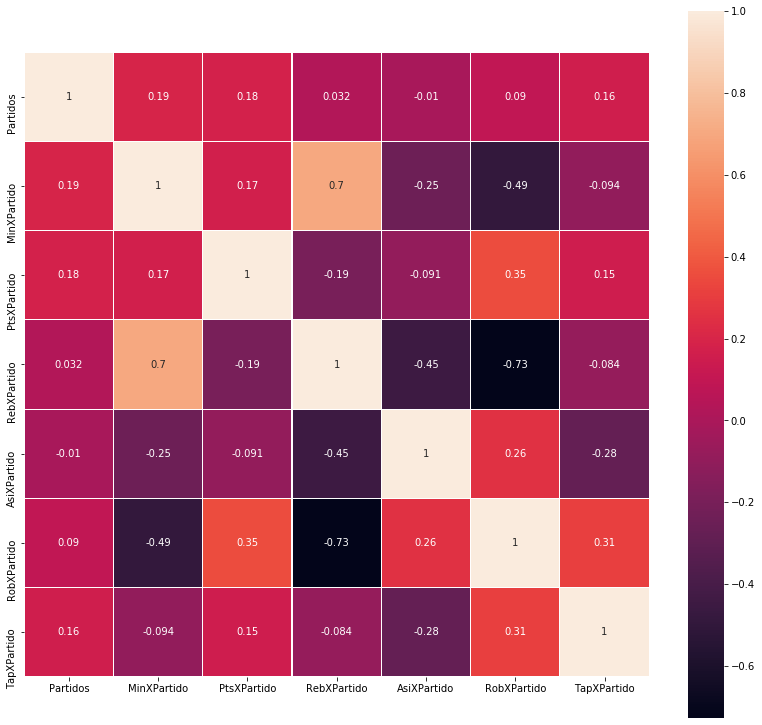

In [49]:
## DEFINIR TAMAÑO DE LA FIGURA 
plt.figure(figsize=(14,13))

### MATRIZ DE CORRELACION
sns.heatmap(matriz_correlacion,linewidths=0.2,vmax=1.0, square=True, linecolor="white",annot=True)

## MOSTRAR MATRIZ
display(plt.show())
plt.gcf().clear()
plt.clear()
